# Fake Review Generation on the Yelp Dataset

More information on the Yelp dataset: https://www.yelp.com/dataset

In [ ]:
!python3 -V

Python 3.7.15


In [ ]:
!pip3 install torch==1.7.1+cu110 torchvision==0.8.2+cu110 torchaudio==0.7.2 -f https://download.pytorch.org/whl/torch_stable.html
!pip install transformers
!pip install fastai==2.2.7

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |███████████████████████         | 834.1 MB 979 kB/s eta 0:05:30tcmalloc: large alloc 1147494400 bytes == 0x390c4000 @  0x7f901150c615 0x5d631c 0x51e4f1 0x51e67b 0x4f7585 0x49ca7c 0x4fdff5 0x49caa1 0x4fdff5 0x49ced5 0x4f60a9 0x55f926 0x4f60a9 0x55f926 0x4f60a9 0x55f926 0x5d7c18 0x5d9412 0x586636 0x5d813c 0x55f3fd 0x55e571 0x5d7cf1 0x49ced5 0x55e571 0x5d7cf1 0x49ec69 0x5d7c18 0x49ca7c 0x4fdff5 0x49ced5
     |█████████████████████████████▏  | 1055.7 MB 1.2 MB/s eta 0:01:26tcmalloc: large alloc 1434370048 bytes == 0x7d71a000 @  0x7f901150c615 0x5d631c 0x51e4f1 0x51e67b 0x4f7585 0x49ca7c 0x4fdff5 0x49caa1 0x4fdff5 0x49ced5 0x4f60a9 0x55f926 0x4f60a9 0x55f926 0x4f60a9 0x55f926 0x5d7c18 0x5d9412 0x586636 0x5d813c 0x55f3fd 0x55e571 0x5d7cf1 0x49ced5 0x55e571 0x5d7cf1 0x49ec69 0x5d7c18 0x49ca7c 0x4fdff5 0x49ced5
     |█████

In [ ]:
import gc
import torch
from transformers import GPT2LMHeadModel, GPT2TokenizerFast
from fastai.text.all import *

In [ ]:
print(torch. __version__)

1.7.1+cu110


In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [ ]:
#!tar -xvf /content/drive/MyDrive/YelpDataset/yelp_dataset.tar

In [ ]:
!ls

drive  sample_data


In [ ]:
#%cp /content/yelp_academic_dataset_review.json /content/drive/MyDrive/YelpDataset

In [ ]:
%cp /content/drive/MyDrive/YelpDataset/yelp_academic_dataset_review.json /content/

In [ ]:
import json
import pandas as pd
data_file = open("yelp_academic_dataset_review.json")
data = []
i = 0
for line in data_file:
  data.append(json.loads(line))
  if i==2000:
    break
  i+=1
df = pd.DataFrame(data)
data_file.close()

In [ ]:
df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is going to take about 2 hours from beginning to end. We have tried it multiple times, because I want to like it! I have been to it's other locations in NJ and never had a bad experience. \n\nThe food is good, but it takes a very long time to come out. The waitstaff is very young, but usually pleasant. We have just had too many experiences where we spent way too long waiting. We usually opt for another diner or restaurant on the weekends, in order to be done quicker.",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,"I've taken a lot of spin classes over the years, and nothing compares to the classes at Body Cycle. From the nice, clean space and amazing bikes, to the welcoming and motivating instructors, every class is a top notch work out.\n\nFor anyone who struggles to fit workouts in, the online scheduling system makes it easy to plan ahead (and there's no need to line up way in advanced like many gyms make you do).\n\nThere is no way I can write this review without giving Russell, the owner of Body Cycle, a shout out. Russell's passion for fitness and cycling is so evident, as is his desire for all...",2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,"Family diner. Had the buffet. Eclectic assortment: a large chicken leg, fried jalapeño, tamale, two rolled grape leaves, fresh melon. All good. Lots of Mexican choices there. Also has a menu with breakfast served all day long. Friendly, attentive staff. Good place for a casual relaxed meal with no expectations. Next to the Clarion Hotel.",2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favorite is the lamb curry and korma. With 10 different kinds of naan!!! Don't let the outside deter you (because we almost changed our minds)...go in and try something new! You'll be glad you did!",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,"Cute interior and owner (?) gave us tour of upcoming patio/rooftop area which will be great on beautiful days like today. Cheese curds were very good and very filling. Really like that sandwiches come w salad, esp after eating too many curds! Had the onion, gruyere, tomato sandwich. Wasn't too much cheese which I liked. Needed something else...pepper jelly maybe. Would like to see more menu options added such as salads w fun cheeses. Lots of beer and wine as well as limited cocktails. Next time I will try one of the draft wines.",2017-01-14 20:54:15


In [ ]:
#process the yelp dataset in similar fashion to the amazon review dataset.
#we'll only need the text coloumn in our case
df_main = df[['text']]

In [ ]:
df_main = df_main.rename(columns={'text': 'reviewText'})

In [ ]:
df_main.head()

,reviewText
0,"If you decide to eat here, just be aware it is going to take about 2 hours from beginning to end. We have tried it multiple times, because I want to like it! I have been to it's other locations in NJ and never had a bad experience. \n\nThe food is good, but it takes a very long time to come out. The waitstaff is very young, but usually pleasant. We have just had too many experiences where we spent way too long waiting. We usually opt for another diner or restaurant on the weekends, in order to be done quicker."
1,"I've taken a lot of spin classes over the years, and nothing compares to the classes at Body Cycle. From the nice, clean space and amazing bikes, to the welcoming and motivating instructors, every class is a top notch work out.\n\nFor anyone who struggles to fit workouts in, the online scheduling system makes it easy to plan ahead (and there's no need to line up way in advanced like many gyms make you do).\n\nThere is no way I can write this review without giving Russell, the owner of Body Cycle, a shout out. Russell's passion for fitness and cycling is so evident, as is his desire for all..."
2,"Family diner. Had the buffet. Eclectic assortment: a large chicken leg, fried jalapeño, tamale, two rolled grape leaves, fresh melon. All good. Lots of Mexican choices there. Also has a menu with breakfast served all day long. Friendly, attentive staff. Good place for a casual relaxed meal with no expectations. Next to the Clarion Hotel."
3,"Wow! Yummy, different, delicious. Our favorite is the lamb curry and korma. With 10 different kinds of naan!!! Don't let the outside deter you (because we almost changed our minds)...go in and try something new! You'll be glad you did!"
4,"Cute interior and owner (?) gave us tour of upcoming patio/rooftop area which will be great on beautiful days like today. Cheese curds were very good and very filling. Really like that sandwiches come w salad, esp after eating too many curds! Had the onion, gruyere, tomato sandwich. Wasn't too much cheese which I liked. Needed something else...pepper jelly maybe. Would like to see more menu options added such as salads w fun cheeses. Lots of beer and wine as well as limited cocktails. Next time I will try one of the draft wines."


In [ ]:
df_main.shape

(2001, 1)

In [ ]:
sample_size = len(df_main)

In [ ]:
sample_df = df_main.sample(n=sample_size, random_state=2021).dropna().reset_index()

In [ ]:
sample_df.dtypes

index          int64
reviewText    object
dtype: object

In [ ]:
del df_main
gc.collect()

11481

In [ ]:
#Let's import the pretrained GPT2 model and the tokenizers
pretrained_weights = 'gpt2'
tokenizer = GPT2TokenizerFast.from_pretrained(pretrained_weights)
model = GPT2LMHeadModel.from_pretrained(pretrained_weights)

In [ ]:
device = torch.device("cuda")

In [ ]:
model.to(device)

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0): GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
      (1): GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dro

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df_train, df_valid = train_test_split(sample_df, random_state=2021, test_size=0.1)

In [ ]:
all_texts = np.concatenate([df_train["reviewText"].values, df_valid["reviewText"].values])

In [ ]:
all_texts.shape

(2001,)

In [ ]:
e = 0
toRemove = []
for i in range(len(all_texts)):
  if all_texts[i]=="":
    e+=1
    print(f"all_texts[{i}] is empty")
    all_texts[i] = 'a'
    toRemove.append(i)

print(f"Number of rows that are empty={e}. To remove indecies={toRemove}")

Number of rows that are empty=0. To remove indecies=[]


In [ ]:
class TransformersTokenizer(Transform):
    def __init__(self, tokenizer): self.tokenizer = tokenizer
    def encodes(self, x): 
        toks = self.tokenizer.tokenize(x)
        return tensor(self.tokenizer.convert_tokens_to_ids(toks))
    def decodes(self, x): return TitledStr(self.tokenizer.decode(x.cpu().numpy()))

In [ ]:
splits = [list(df_train.index), list(df_valid.index)]
tls = TfmdLists(all_texts, TransformersTokenizer(tokenizer), splits=splits, dl_type=LMDataLoader)

In [ ]:
e = 0
for i in range(len(tls.train)):
  if tls.train[i].type() != 'torch.LongTensor':
    #print(f'tls.train[{i}] not a long tensor')
    #print(f'tls.train[{i}] is a {tls.train[i].type()}')
    e+=1
print("Total of e=",e," empty")

Token indices sequence length is longer than the specified maximum sequence length for this model (1144 > 1024). Running this sequence through the model will result in indexing errors


Total of e= 0  empty


In [ ]:
tls.tfms(tls.train.items[0]).shape, tls.tfms(tls.valid.items[0]).shape

(torch.Size([85]), torch.Size([70]))

In [ ]:
show_at(tls.train, 0)

Awesome I can't wait to go again next year best attraction around.
Almost feels real in some of the houses.
Haunted hayride was spectacular with fire torches machine guns chainsaws Churches demonic preist.
Walking in the woods with a little glow stick is awesome and scary.Very real feeling.
FORGET bush gardens howl o scream and haloween horror nights all you need is screamagedon.


In [ ]:
show_at(tls.valid, 0)

Went in for full set, request long showed picture. Nails were cut short no big deal, the issue came when I pointed out a crooked nail and was told it hadn't been filed, acrylic was put on nail still crooked. It was filed and getting shorter and shorter. This wasn't my first visit however it will be my last.


In [ ]:
bs,sl = 4,100
dls = tls.dataloaders(bs=bs, seq_len=sl, device=device)

In [ ]:
dls.show_batch(max_n=2)

,text,text_
0,"We went around 6 and it was more packed than I expected. I knew it would be busy but I was surprised. The staff was amazing. We waited in line for about 8 minutes regardless of it being a huge line going out side. Found a table and had our food in less than five minutes. Even with the amount of people they had, it ran so smoothly. One sandwich was messed up but it was very loud in there so I don't think she heard me correctly but someone came to","went around 6 and it was more packed than I expected. I knew it would be busy but I was surprised. The staff was amazing. We waited in line for about 8 minutes regardless of it being a huge line going out side. Found a table and had our food in less than five minutes. Even with the amount of people they had, it ran so smoothly. One sandwich was messed up but it was very loud in there so I don't think she heard me correctly but someone came to our"
1,"ashimi or maki, but I really enjoy their rice bowls and tempura. This location is not terribly busy so you won't have to wait in line for too long. \n\nThey also provide catering options so you can have sushi and maki platters at your functions.\n\nThe service has always been good, for fast food. And I know I can keep somewhat on my eating plan when I go here. It's a fast lunch or dinner if you're in a hurry","imi or maki, but I really enjoy their rice bowls and tempura. This location is not terribly busy so you won't have to wait in line for too long. \n\nThey also provide catering options so you can have sushi and maki platters at your functions.\n\nThe service has always been good, for fast food. And I know I can keep somewhat on my eating plan when I go here. It's a fast lunch or dinner if you're in a hurry to"


### Fine Tuning 

In [ ]:
class DropOutput(Callback):
    def after_pred(self): self.learn.pred = self.pred[0]

In [ ]:
learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), cbs=[DropOutput], metrics=Perplexity()).to_fp16()

In [ ]:
learn.validate()

(#2) [3.889885663986206,48.905296325683594]

SuggestedLRs(lr_min=2.7542287170945203e-07, lr_steep=0.00010964782268274575)

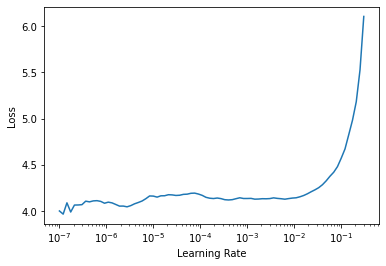

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(5, 1e-2)

epoch,train_loss,valid_loss,perplexity,time
0,3.915789,4.632727,102.794014,01:07
1,4.121023,4.664998,106.165382,01:05
2,3.535873,4.690805,108.940887,01:03
3,2.813484,4.765830,117.428490,01:05
4,2.237785,5.017682,151.060745,01:05


A perplexity of 100 means that whenever the model is predicting the next word, the model is as confused as if it had to pick between 100 different words

In [ ]:
#save model weights. Commented out since we don't need it now
#learn.save("gpt2-finetuned-amazon-reviews-sample-1cycle-Books_5")

In [ ]:
df_valid.head(1)

,index,reviewText
933,304,"I was here a few times before and didn't review. I come here for the food, NOT the service. The establishment is lacking in its service. Their food is always great though! Very delicious for a dive bar."


In [ ]:
prompt = "Satisfied with the food"

In [ ]:
prompt_ids = tokenizer.encode(prompt)
inp = tensor(prompt_ids)[None].cuda()
inp.shape

torch.Size([1, 6])

In [ ]:
preds = learn.model.generate(inp, max_length=40, num_beams=5, temperature=0.75, early_stopping=True, no_repeat_ngram_size=2)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [ ]:
tokenizer.decode(preds[0].cpu().numpy())

'Satisfied with the food, service, and ambience. \n\nI ordered the lamb kebab (Shish Kebab) and it was okay. However, the meat was'